In [1]:
import xarray as xr
import numpy as np
import matplotlib as plt
%matplotlib inline
xr.set_options(display_style='text');

In [2]:
from xgcm import Grid
from xgcm.autogenerate import generate_grid_ds

In [4]:
ds = xr.open_dataset('global-reanalysis-phy-001-031-grepv2-monthly_1615223262409.nc')
ds

<xarray.Dataset>
Dimensions:    (depth: 75, latitude: 73, longitude: 381, time: 1)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
  * latitude   (latitude) float32 -80.0 -79.75 -79.5 ... -62.5 -62.25 -62.0
  * time       (time) datetime64[ns] 2015-01-16
  * longitude  (longitude) float32 -65.0 -64.75 -64.5 -64.25 ... 29.5 29.75 30.0
Data variables:
    vo_oras    (time, depth, latitude, longitude) float32 ...
    uo_oras    (time, depth, latitude, longitude) float32 ...
Attributes:
    product:                       GLOBAL_REANALYSIS_PHY_001_031
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          Global
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    references:                    http://marine.copernicus.eu
    licence:                       http://marine.copernicus.eu/services-portf...
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    history:                       Creation 2020-Aug-27 16:53:21 GMT+0200
    title:                         Daily mean fields for product GLOBAL_REANA...
    dataset:                       global-reanalysis-phy-001-031-grepv2-monthly
    source:                        Copernicus Marine Service
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:

In [5]:
grid = Grid(ds, coords={'X': {'center': 'longitude'},
                        'Y': {'center': 'latitude'},
                        'Z': {'center': 'depth'}},
                periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   longitude
Y Axis (not periodic, boundary=None):
  * center   latitude
Z Axis (not periodic, boundary=None):
  * center   depth

In [6]:
dz = ds.depth.diff('depth')
dz

<xarray.DataArray 'depth' (depth: 74)>
array([  1.0500951,   1.1118269,   1.1885982,   1.2840807,   1.4026732,
         1.5494847,   1.7302313,   1.9509296,   2.2173605,   2.5342798,
         2.90448  ,   3.3278198,   3.8006802,   4.3162594,   4.8656406,
         5.4398193,   6.031872 ,   6.638748 ,   7.2621994,   7.908844 ,
         8.589478 ,   9.318268 ,  10.111885 ,  10.988983 ,  11.969704 ,
        13.075806 ,  14.330399 ,  15.758301 ,  17.385391 ,  19.240097 ,
        21.351212 ,  23.74939  ,  26.46582  ,  29.531097 ,  32.97528  ,
        36.825714 ,  41.105408 ,  45.831696 ,  51.014282 ,  56.652405 ,
        62.733704 ,  69.23273  ,  76.10956  ,  83.31073  ,  90.76886  ,
        98.40613  , 106.13696  , 113.869995 , 121.51599  , 128.98706  ,
       136.20398  , 143.10303  , 149.625    , 155.73108  , 161.39502  ,
       166.60278  , 171.35498  , 175.65918  , 179.531    , 182.99487  ,
       186.07617  , 188.80493  , 191.21094  , 193.32495  , 195.177    ,
       196.79419  , 198.20166  , 199.42627  , 200.48877  , 201.40918  ,
       202.2041   , 202.89209  , 203.48584  , 203.99707  ], dtype=float32)
Coordinates:
  * depth    (depth) float32 1.556 2.668 3.856 ... 5.495e+03 5.698e+03 5.902e+03

In [7]:
R = 6.378e6
dy = 2*np.pi*R / 360 / 3
dy

37105.69989739945

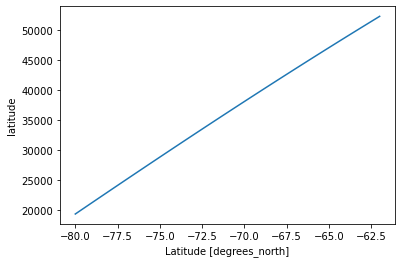

In [8]:
dx = 2*np.pi*R / 360 * np.cos(np.deg2rad(ds.latitude))
dx.plot()

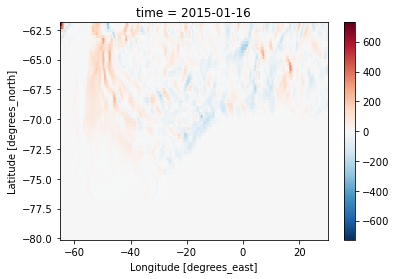

In [9]:
v_vint = (ds.vo_oras * dz).sum(dim='depth')
v_vint.plot()

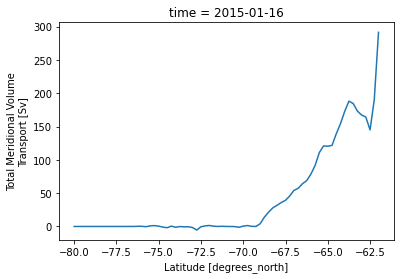

In [10]:
v_mint = (v_vint * dx).sum(dim='longitude') / 1e6
v_mint.attrs['units'] = 'Sv'
v_mint.attrs['long_name'] = 'Total Meridional Volume Transport'
v_mint.plot()